# Face Data Initialization Phase

In [ ]:
#@title pip install modules
%%capture
'''
'''

In [ ]:
#@title import modules
import numpy as np
import cv2
from matplotlib import pyplot as plt
import dlib
from imutils import face_utils
import os
import pandas as pd
from time import time
import urllib.request
from PIL import Image, ImageDraw

# Face Detection Phase

In [ ]:
#@title set up data
%%capture
!gdown https://drive.google.com/uc?id=15IbzGjeHd48aiEj_XK40sv90FdDeqnMH
!unzip /content/img_faceDetect.zip

# Convenient shorthand for a function
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Getting filenames
directory = '/content/img_faceDetect/'
imgnames = []

for filename in os.listdir(directory):
  if filename.startswith('ad'):
    imgnames.append(filename)

# Sorting list ahead of time and printing
imgnames.sort()

In [ ]:
#@title set up model
%%capture
!wget https://github.com/davisking/dlib-models/raw/master/mmod_human_face_detector.dat.bz2
!bunzip2 'mmod_human_face_detector.dat.bz2'
dnnFaceDetector = dlib.cnn_face_detection_model_v1('mmod_human_face_detector.dat')

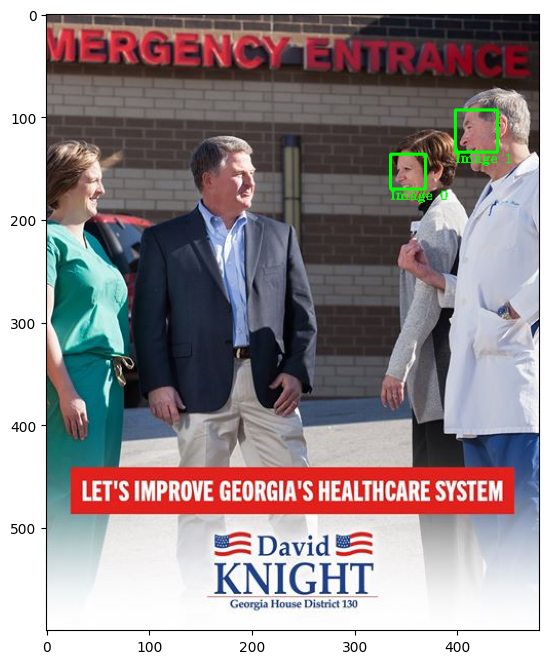

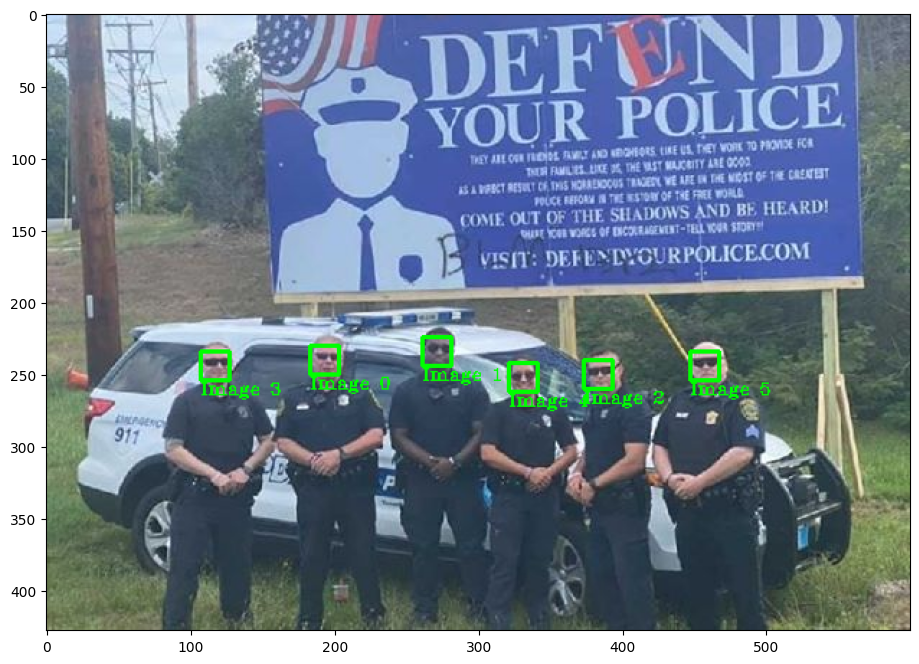

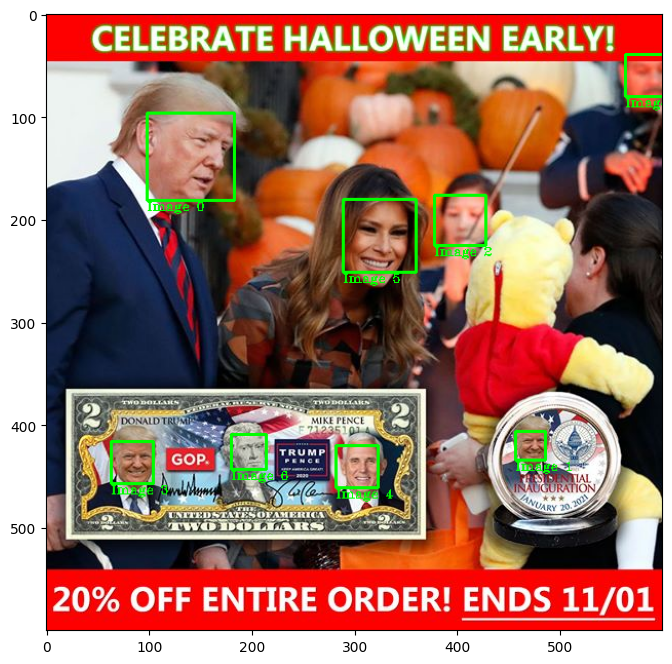

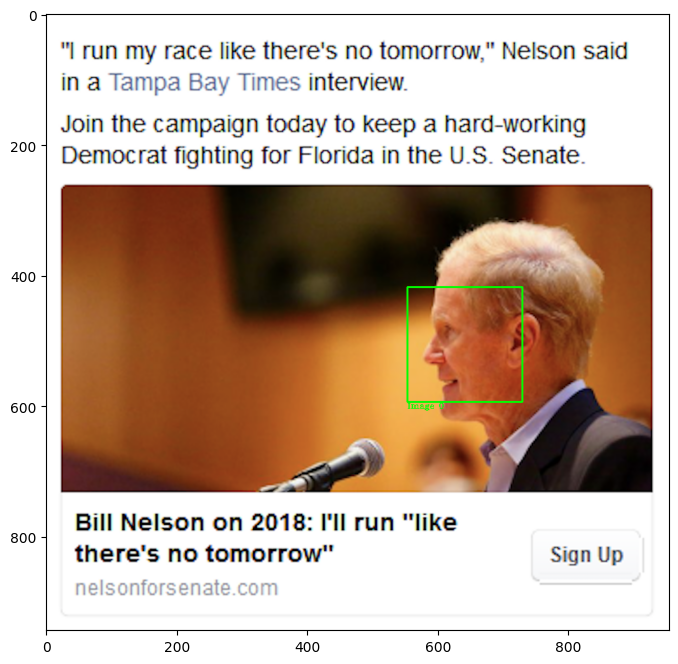

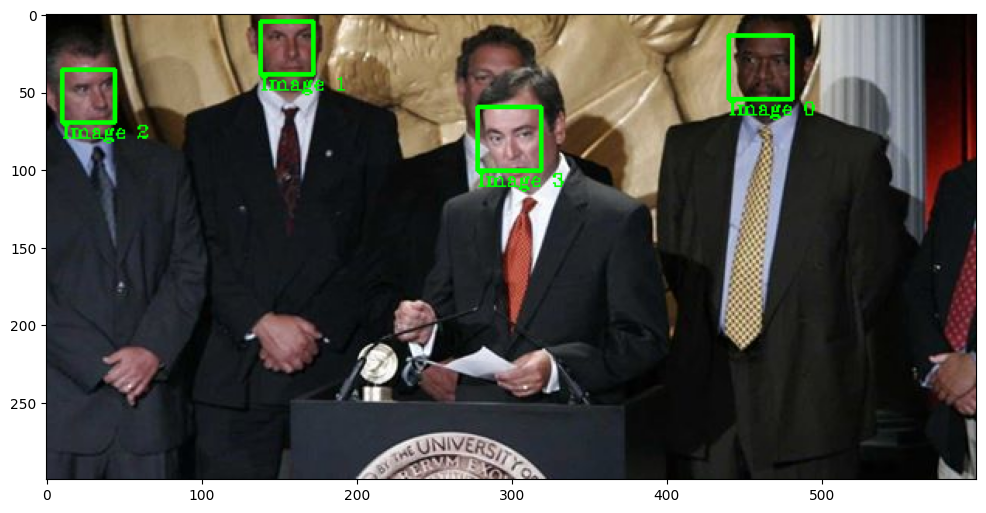

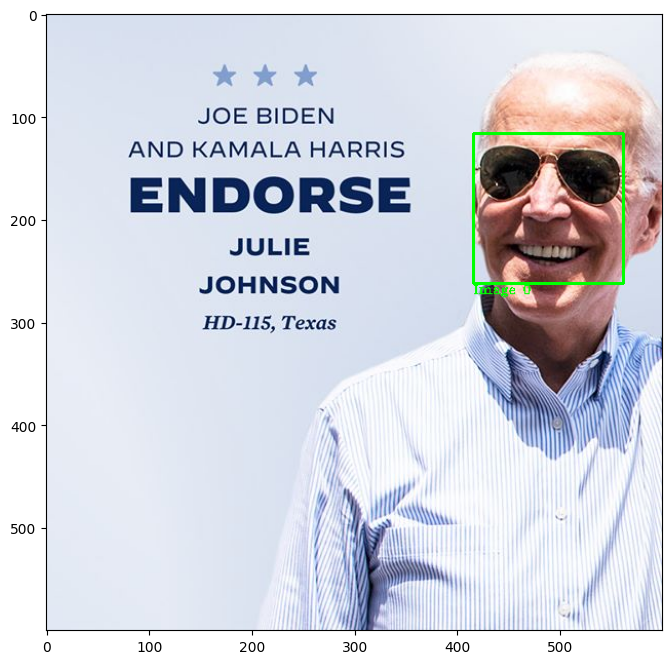

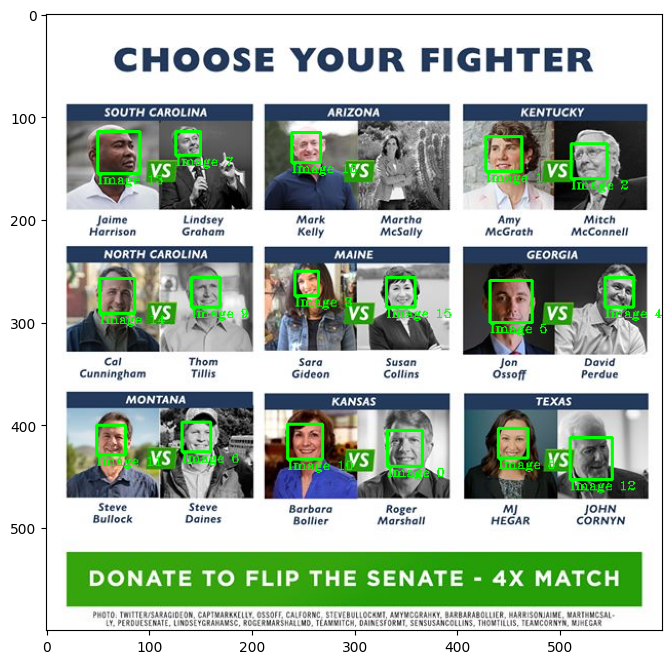

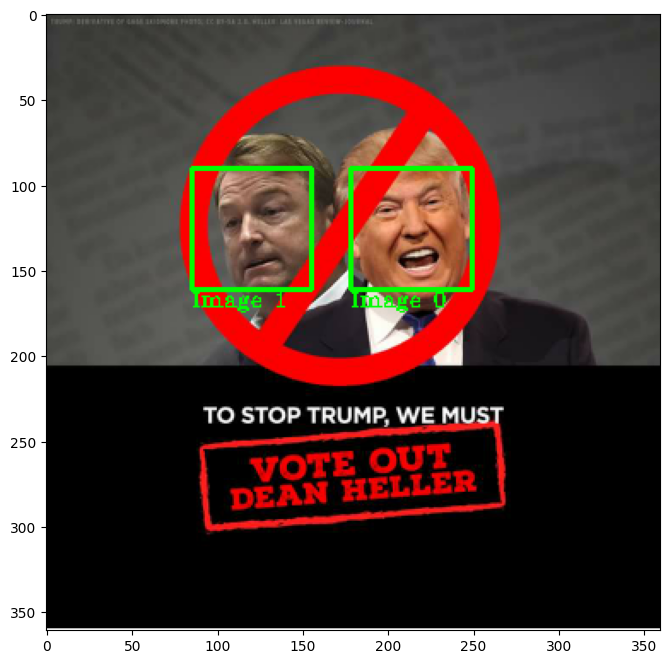

In [ ]:
#@title detect faces
for name in imgnames:
  path = directory + name
  img = cv2.imread(path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  dnn_locations = dnnFaceDetector(gray, 2)
  for (i, location) in enumerate(dnn_locations):
    x1 = location.rect.left()
    y1 = location.rect.top()
    x2 = location.rect.right()
    y2 = location.rect.bottom()
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    img = cv2.putText(img,'Image ' + str(i),(x1,y2+10), cv2.FONT_HERSHEY_TRIPLEX, 0.4, (0, 255, 0), 1)

  plt.figure(figsize=(12,8))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Face Recognition Phase

In [ ]:
#@title set up data
%%capture
!gdown https://drive.google.com/uc?id=1K_3YfC8OpxD0zF3MSOKb-iXnD1E9vkOb
!7z x img_faceRecog.zip

In [ ]:
#@title set up model
%%capture
!pip install face_recognition
import face_recognition

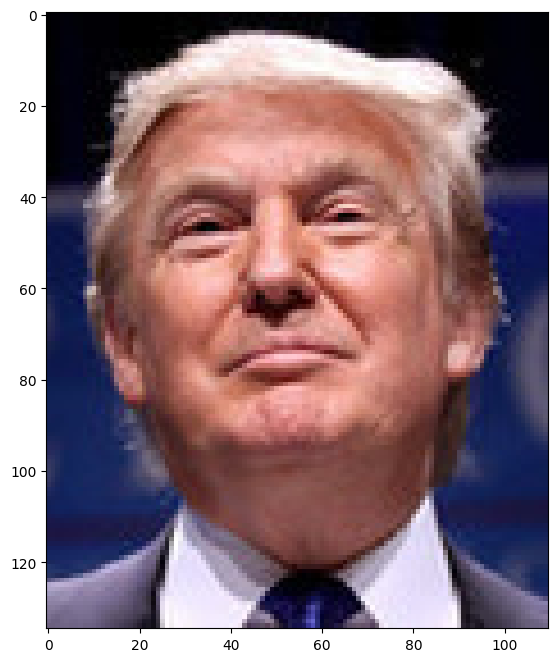

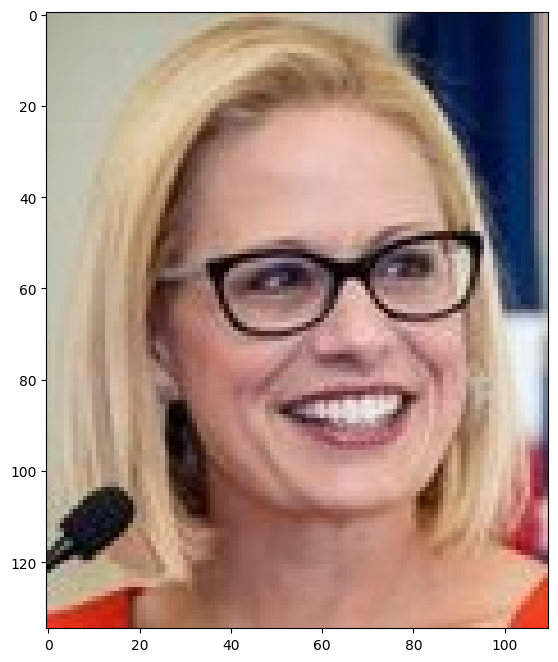

In [ ]:
#@title show reference images
# Trump
trumpimg = cv2.imread('/content/img_faceRecog/known/trump.png')
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(trumpimg, cv2.COLOR_BGR2RGB))

# Sinema
sinemaimg = cv2.imread('/content/img_faceRecog/known/sinema.jpg')
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(sinemaimg, cv2.COLOR_BGR2RGB))

In [ ]:
#@title sorting files
# Getting filenames
directory = '/content/img_faceRecog/unknown/'
imgnames = []

for filename in os.listdir(directory):
  if filename.endswith('.png'):
    imgnames.append(filename)

# Sorting list ahead of time and printing
# for name in imgnames:
#   print(name)

In [ ]:
#@title find matches
# Loading models for each person
trump = face_recognition.load_image_file('/content/img_faceRecog/known/trump.png')
sinema = face_recognition.load_image_file('/content/img_faceRecog/known/sinema.jpg')

# Creating DataFrame
df = pd.DataFrame(columns=['filename','trump_match','sinema_match'])

# Looping through each image
for name in imgnames:

  try:
    # Getting the image data
    img = face_recognition.load_image_file(directory+name)
  except:
    print('Something went wrong with filename ' + path)
    continue

  # Recognizing faces
  for i in range(len(face_recognition.face_encodings(img))):
    trump_encoding = face_recognition.face_encodings(trump)
    sinema_encoding = face_recognition.face_encodings(sinema)
    img_encoding = face_recognition.face_encodings(img)[i]
    trump_result = face_recognition.compare_faces(trump_encoding, img_encoding)
    sinema_result = face_recognition.compare_faces(sinema_encoding, img_encoding)
    df.loc[len(df)] = [name,trump_result,sinema_result]

display(df)

filename trump_match sinema_match
0    98976889.png      [True]      [False]
1   100027382.png      [True]      [False]
2    99806260.png     [False]      [False]
3    99806260.png     [False]      [False]
4    99806260.png     [False]      [False]
..            ...         ...          ...
77   98908654.png     [False]      [False]
78   99686852.png      [True]      [False]
79   97376448.png      [True]      [False]
80   99706011.png      [True]      [False]
81  100080020.png      [True]      [False]

[82 rows x 3 columns]

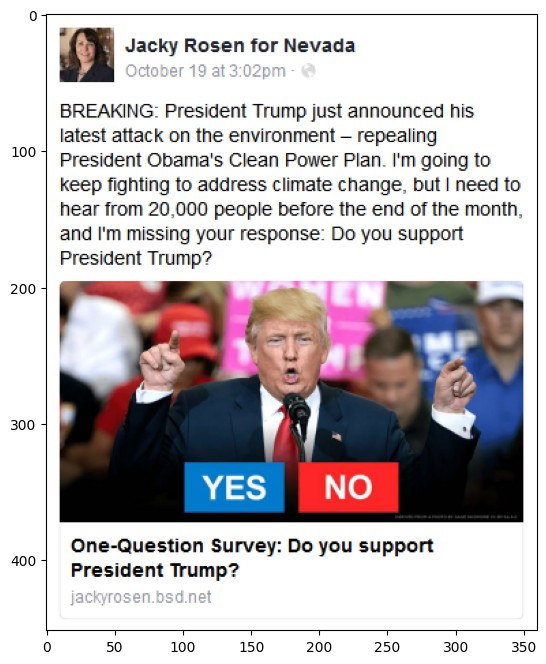

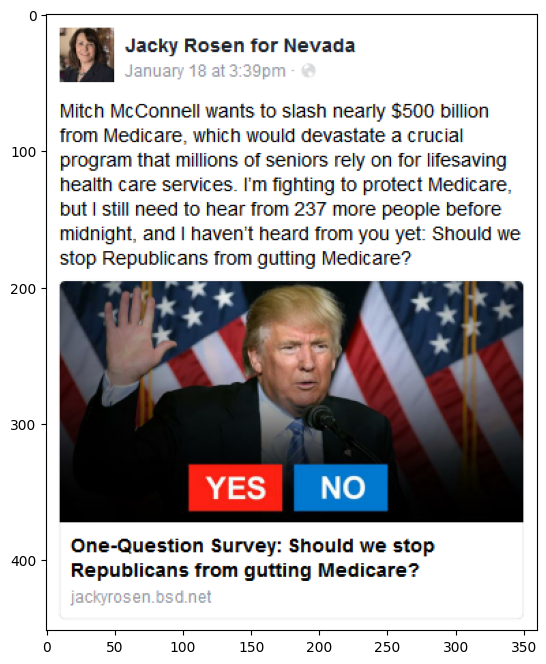

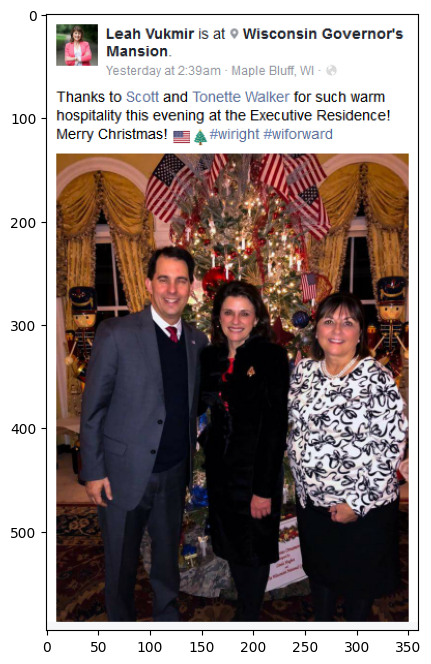

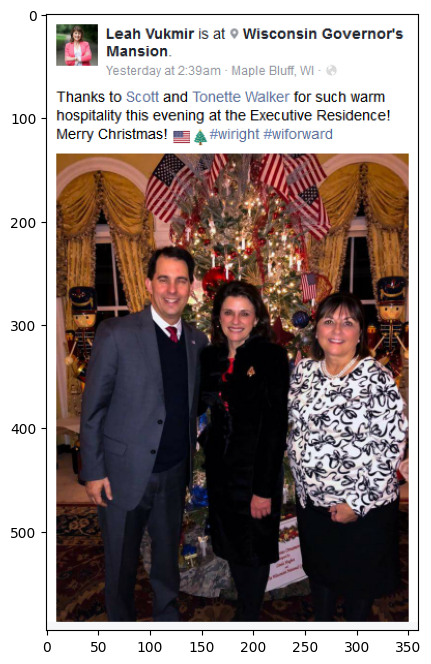

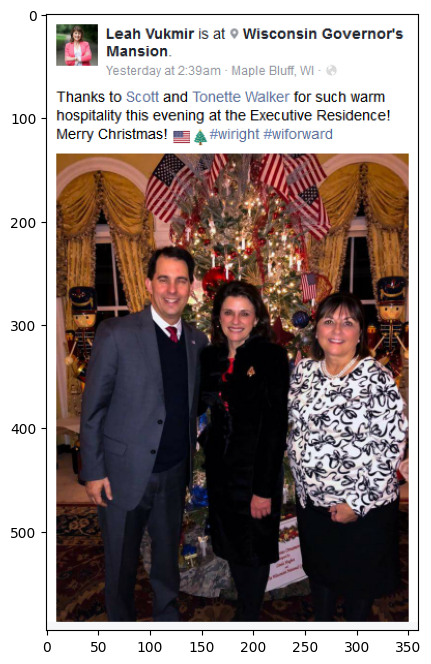

In [ ]:
#@title show images to confirm results
for i in range(5):
  flick = cv2.imread('/content/img_faceRecog/unknown/' + df.filename.to_list()[i])
  plt.figure(figsize=(12,8))
  plt.imshow(cv2.cvtColor(flick, cv2.COLOR_BGR2RGB))